<a href="https://colab.research.google.com/github/abhishekvickyvyas/Heart_Disease_Prediction/blob/main/BDMH_PROJECT_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HEART DISEASE PREDICTION**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as cl
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
fscore_dict = {}

In [ ]:
data1=pd.read_csv("/content/drive/My Drive/BDMH/heart.csv")
data2=pd.read_csv("/content/drive/My Drive/BDMH/heart.csv")
target = data1['target']
data1 = data1.drop(columns=['target','sex','age'],axis=1)
data2 = data2.drop(columns=['target'],axis=1)
print(data1)
print(data2)


     cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal
0     3       145   233    1        0      150      0      2.3      0   0     1
1     2       130   250    0        1      187      0      3.5      0   0     2
2     1       130   204    0        0      172      0      1.4      2   0     2
3     1       120   236    0        1      178      0      0.8      2   0     2
4     0       120   354    0        1      163      1      0.6      2   0     2
..   ..       ...   ...  ...      ...      ...    ...      ...    ...  ..   ...
298   0       140   241    0        1      123      1      0.2      1   0     3
299   3       110   264    0        1      132      0      1.2      1   0     3
300   0       144   193    1        1      141      0      3.4      1   2     3
301   0       130   131    0        1      115      1      1.2      1   1     3
302   1       130   236    0        0      174      0      0.0      1   1     2

[303 rows x 11 columns]
     age  sex  

**MULTI-LAYER PERCEPTRON MODEL**

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(512, activation=tf.nn.softmax))

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
target = np.array(target)
data1 = np.array(data1)
data2 = np.array(data2)
train_x,test_x,train_y,test_y = train_test_split(data1,target,test_size=0.2)
x_train,x_test,y_train,y_test = train_test_split(data2,target,test_size=0.2)
model.fit(train_x,train_y,epochs=50)
pred1 = model.predict_classes(test_x)

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(512, activation=tf.nn.softmax))

model1.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(x_train,y_train,epochs=50)
pred2 = model1.predict_classes(x_test)


Epoch 1/50
8/8 [==============================] - 0s 4ms/step - loss: 4.5335 - accuracy: 0.3926 
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.7552 - accuracy: 0.6033
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6006 - accuracy: 0.6901
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 0.5851 - accuracy: 0.6942
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6015 - accuracy: 0.6612
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.6198
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 0.8372 - accuracy: 0.5579
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.6157
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 0.5501 - accuracy: 0.7273
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6392 - accuracy: 0.6488
Epoch 11/50
8/8 [=====================

In [ ]:
print("*************Neural Network*************************")
print("******************************************************")
print("Accuracy without using two features namely \"sex\" , \"age\" : ")

print(accuracy_score(test_y,pred1))
print("*******************************************************")
print("Accuracy with using two features namely \"sex\" , \"age\" : ")
print(accuracy_score(y_test,pred2))

*************Neural Network*************************
******************************************************
Accuracy without using two features namely "sex" , "age" : 
0.6065573770491803
*******************************************************
Accuracy with using two features namely "sex" , "age" : 
0.8032786885245902


In [ ]:
accuracy_dict[11] = []
fscore_dict[11] = []
accuracy_dict[13] = []
fscore_dict[13] = []

accuracy_dict[11].append(accuracy_score(test_y, pred1))
fscore_dict[11].append(f1_score(test_y, pred1, average='macro'))
print("*******************************************************")
print("F1 score without using two features namely \"sex\" , \"age\" : ")
print("F1 score",f1_score(test_y, pred1, average='macro'))

*******************************************************
F1 score without using two features namely "sex" , "age" : 
F1 score 0.6038961038961039


In [ ]:
accuracy_dict[13].append(accuracy_score(y_test, pred2))
fscore_dict[13].append(f1_score(y_test, pred2, average='macro'))
print("*******************************************************")
print("F1 score with using two features namely \"sex\" , \"age\" : ")
print("F1 score",f1_score(y_test, pred2, average='macro'))

*******************************************************
F1 score with using two features namely "sex" , "age" : 
F1 score 0.8006535947712419


**SVM MODEL**

In [ ]:
def notmalise__in_0to_1Data(fullcol):
# -----------------------------------------------------------------------------------------
    min_is=min(fullcol)
    max_is=max(fullcol)
    fullcol1=fullcol.apply(lambda x:((x-min_is)/(max_is-min_is)))
    
#     ---------------------------------------------
    
    return fullcol1
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn import preprocessing
from sklearn import metrics
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/My Drive/BDMH/heart.csv", header = 0)
df1=pd.read_csv("/content/drive/My Drive/BDMH/heart.csv", header = 0)
X= df.drop(columns=['target','age','sex'],axis=0)
X1=df1.drop(columns=['target'],axis=0)
y=df['target']
y1=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_normalise=X_train.apply(lambda col: notmalise__in_0to_1Data(col), axis = 0)
X_test_normalise=X_test.apply(lambda col: notmalise__in_0to_1Data(col), axis = 0)
svm1 =SVC(C=1000,gamma=0.01,kernel="rbf")
svm1.fit(X_train_normalise, y_train)

svm_predict= svm1.predict(X_test_normalise)
print("Accuracy of svm (Without age and sex) is ",metrics.accuracy_score(y_test, svm_predict))
accuracy_dict[11].append(accuracy_score(y_test, svm_predict))
fscore_dict[11].append(f1_score(y_test, svm_predict, average='macro'))
print("*******************************************************")
print("F1 score without using two features namely \"sex\" , \"age\" : ")
print("F1 score",f1_score(y_test, svm_predict, average='macro'))
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)
X_train_normalise=X_train.apply(lambda col: notmalise__in_0to_1Data(col), axis = 0)
X_test_normalise=X_test.apply(lambda col: notmalise__in_0to_1Data(col), axis = 0)
svm1 =SVC(C=1000,gamma=0.01,kernel="rbf")
svm1.fit(X_train_normalise, y_train)

svm_predict= svm1.predict(X_test_normalise)
print("Accuracy of svm (With age and sex)  is ",metrics.accuracy_score(y_test, svm_predict))
accuracy_dict[13].append(accuracy_score(y_test, svm_predict))
fscore_dict[13].append(f1_score(y_test, svm_predict, average='macro'))
print("*******************************************************")
print("F1 score with using two features namely \"sex\" , \"age\" : ")
print("F1 score",f1_score(y_test, svm_predict, average='macro'))

Accuracy of svm (Without age and sex) is  0.7704918032786885
*******************************************************
F1 score without using two features namely "sex" , "age" : 
F1 score 0.7511655011655012
Accuracy of svm (With age and sex)  is  0.8360655737704918
*******************************************************
F1 score with using two features namely "sex" , "age" : 
F1 score 0.8338779956427014


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('/content/drive/My Drive/BDMH/heart.csv')
data2 = pd.read_csv('/content/drive/My Drive/BDMH/heart.csv')
d=data.isnull().sum(axis = 1)
x=data['target']
a = data['age']
s = data['sex']
data = data.drop(columns=['target','age','sex'],axis=0)
data2=data2.drop(columns=['target'],axis=0)
classifier = LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(data,x,test_size=0.2)
classifier.fit(x_train, y_train)
y=classifier.predict(x_test)
print("----------------------------------- Logistic Regression MODEL -----------------------------------")
print("***********************Without age and sex column************************")
print("ACCURACY SCORE:-",accuracy_score(y_test,y))
accuracy_dict[11].append(accuracy_score(y_test, y))
fscore_dict[11].append(f1_score(y_test, y, average='macro'))
print("*******************************************************")
print("F1 score without using two features namely \"sex\" , \"age\" : ")
print("F1 score",f1_score(y_test, y, average='macro'))
print("\n")
x_train1,x_test1,y_train1,y_test1=train_test_split(data2,x,test_size=0.2)
classifier.fit(x_train1,y_train1)
y1=classifier.predict(x_test1)
print("**********************With age and sex column****************************")
print("ACCURACY SCORE:-",accuracy_score(y_test1,y1))
accuracy_dict[13].append(accuracy_score(y_test1, y1))
fscore_dict[13].append(f1_score(y_test1, y1, average='macro'))
print("*******************************************************")
print("F1 score with using two features namely \"sex\" , \"age\" : ")
print("F1 score",f1_score(y_test1, y1, average='macro'))




----------------------------------- Logistic Regression MODEL -----------------------------------
***********************Without age and sex column************************
ACCURACY SCORE:- 0.8032786885245902
*******************************************************
F1 score without using two features namely "sex" , "age" : 
F1 score 0.8006535947712419


**********************With age and sex column****************************
ACCURACY SCORE:- 0.8524590163934426
*******************************************************
F1 score with using two features namely "sex" , "age" : 
F1 score 0.8523002421307506


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('/content/drive/My Drive/BDMH/heart.csv')
data2 = pd.read_csv('/content/drive/My Drive/BDMH/heart.csv')
d=data.isnull().sum(axis = 1)
x=data['target']
a = data['age']
s = data['sex']
data = data.drop(columns=['target','age','sex'],axis=0)
data2=data2.drop(columns=['target'],axis=0)
classifier = RandomForestClassifier(max_depth=2, random_state=0)
x_train,x_test,y_train,y_test=train_test_split(data,x,test_size=0.2)
classifier.fit(x_train, y_train)
y=classifier.predict(x_test)
print("----------------------------------- Random-Forest Model -----------------------------------")
print("***********************Without age and sex column************************")
print("ACCURACY SCORE:-",accuracy_score(y_test,y))
accuracy_dict[11].append(accuracy_score(y_test, y))
fscore_dict[11].append(f1_score(y_test, y, average='macro'))
print("F1 score",f1_score(y_test, y, average='macro'))
print("\n")

x_train1,x_test1,y_train1,y_test1=train_test_split(data2,x,test_size=0.2)
classifier.fit(x_train1,y_train1)
y1=classifier.predict(x_test1)
print("**********************With age and sex column****************************")
print("ACCURACY SCORE:-",accuracy_score(y_test1,y1))
accuracy_dict[13].append(accuracy_score(y_test1, y1))
fscore_dict[13].append(f1_score(y_test1, y1, average='macro'))
print("F1 score",f1_score(y_test1, y1, average='macro'))

----------------------------------- Random-Forest Model -----------------------------------
***********************Without age and sex column************************
ACCURACY SCORE:- 0.7868852459016393
F1 score 0.7750354609929078


**********************With age and sex column****************************
ACCURACY SCORE:- 0.819672131147541
F1 score 0.8165162701668034


**NAIVE-BAYES MODEL**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
data = pd.read_csv("/content/drive/My Drive/BDMH/heart.csv")
data2 = pd.read_csv("/content/drive/My Drive/BDMH/heart.csv")
d=data.isnull().sum(axis = 1)
x=data['target']
a = data['age']
s = data['sex']
data = data.drop(columns=['target','age','sex'],axis=0)
data2=data2.drop(columns=['target'],axis=0)
x_train,x_test,y_train,y_test=train_test_split(data,x,test_size=0.2)
nb = GaussianNB()
nb.fit(x_train,y_train)
pred = nb.predict(x_test)
print("----------------------------------- Naive-Bayes MODEL -----------------------------------")
print("***********************Without age and sex column************************")
print("Accuracy",accuracy_score(y_test,pred))
accuracy_dict[11].append(accuracy_score(y_test, pred))
fscore_dict[11].append(f1_score(y_test, pred, average='macro'))
print("F1 score",f1_score(y_test, pred, average='macro'))
print("\n")
x_train,x_test,y_train,y_test=train_test_split(data2,x,test_size=0.2)
nb = GaussianNB()
nb.fit(x_train,y_train)
pred = nb.predict(x_test)
print("----------------------------------- Naive-Bayes MODEL -----------------------------------")
print("***********************With age and sex column************************")
print("Accuracy",accuracy_score(y_test,pred))
accuracy_dict[13].append(accuracy_score(y_test, pred))
fscore_dict[13].append(f1_score(y_test, pred, average='macro'))
print("F1 score",f1_score(y_test, pred, average='macro'))

----------------------------------- Naive-Bayes MODEL -----------------------------------
***********************Without age and sex column************************
Accuracy 0.8360655737704918
F1 score 0.8282657657657657


----------------------------------- Naive-Bayes MODEL -----------------------------------
***********************With age and sex column************************
Accuracy 0.7704918032786885
F1 score 0.7396341463414634


**KNN MODEL**

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/drive/My Drive/BDMH/heart.csv')
data2 = pd.read_csv('/content/drive/My Drive/BDMH/heart.csv')
d=data.isnull().sum(axis = 1)
x=data['target']
a = data['age']
s = data['sex']
data = data.drop(columns=['target','age','sex'],axis=0)
data2=data2.drop(columns=['target'],axis=0)
classifier = KNeighborsClassifier(n_neighbors=4)
x_train,x_test,y_train,y_test=train_test_split(data,x,test_size=0.2)
classifier.fit(x_train, y_train)
y=classifier.predict(x_test)
print("----------------------------------- KNN MODEL -----------------------------------")
print("***********************Without age and sex column************************")
print("ACCURACY SCORE:-",accuracy_score(y_test,y))
accuracy_dict[11].append(accuracy_score(y_test, y))
fscore_dict[11].append(f1_score(y_test, y, average='macro'))
print("F1 score",f1_score(y_test, y, average='macro'))
print("\n")

x_train1,x_test1,y_train1,y_test1=train_test_split(data2,x,test_size=0.2)
classifier.fit(x_train1,y_train1)
y1=classifier.predict(x_test1)
print("**********************With age and sex column****************************")
print("ACCURACY SCORE:-",accuracy_score(y_test1,y1))
accuracy_dict[13].append(accuracy_score(y_test1, y1))
fscore_dict[13].append(f1_score(y_test1, y1, average='macro'))
print("F1 score",f1_score(y_test1, y1, average='macro'))
print("\n")


----------------------------------- KNN MODEL -----------------------------------
***********************Without age and sex column************************
ACCURACY SCORE:- 0.6229508196721312
F1 score 0.6213225371120108


**********************With age and sex column****************************
ACCURACY SCORE:- 0.5901639344262295
F1 score 0.5829915231063714




**DECISION-TREE CLASSIFIER**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as cl
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/drive/My Drive/BDMH/heart.csv')
data2 = pd.read_csv('/content/drive/My Drive/BDMH/heart.csv')
d=data.isnull().sum(axis = 1)
x=data['target']
a = data['age']
s = data['sex']
data = data.drop(columns=['target','age','sex'],axis=0)

def count(x):
    count=0
    for i in x:
        if i==0:
            count=count+1
        else:
            continue
    return count
data2=data2.drop(columns=['target'],axis=0)
print("Target is 0(i.e. not having heart disease) for",count(x),"patients")
print("Target is 1(i.e. having heart disease) for" ,len(x)-count(x),"patients")
clf = cl(random_state=0,criterion='entropy')
x_train,x_test,y_train,y_test=train_test_split(data,x,test_size=0.2)
clf.fit(x_train,y_train)
y=clf.predict(x_test)
print("***********Decision-tree***************")
print("***********************Without age and sex column************************")
print("Accuracy",accuracy_score(y_test,y))
accuracy_dict[11].append(accuracy_score(y_test, y))
fscore_dict[11].append(f1_score(y_test, y, average='macro'))
print("F1 score",f1_score(y_test, y, average='macro'))
print("\n")

x_train1,x_test1,y_train1,y_test1=train_test_split(data2,x,test_size=0.2)
clf.fit(x_train1,y_train1)
y1=clf.predict(x_test1)
print("***********************With age and sex column************************")
print(accuracy_score(y_test1,y1))
accuracy_dict[13].append(accuracy_score(y_test1, y1))
fscore_dict[13].append(f1_score(y_test1, y1, average='macro'))
print("F1 score",f1_score(y_test1, y1, average='macro'))
print("\n")

Target is 0(i.e. not having heart disease) for 138 patients
Target is 1(i.e. having heart disease) for 165 patients
***********Decision-tree***************
***********************Without age and sex column************************
Accuracy 0.8524590163934426
F1 score 0.8498769483182936


***********************With age and sex column************************
0.7540983606557377
F1 score 0.7530364372469636




**HYBRID APPROACH USING LASSO(LINEAR MODEL) AND RANDOM-FOREST**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
regr = RandomForestClassifier()
ridge = Lasso(alpha=1.0)
data3 = pd.read_csv("/content/drive/My Drive/BDMH/heart.csv")
target = data3['target']
data3 = data3.drop(columns=['target','age','sex'],axis=0)
ridge.fit(data3,target)
cof=ridge.coef_
c=0
to_be_d = []
for i in data3.columns:
  if cof[c]<0:
    to_be_d.append(i)
  c=c+1
data3 = data3.drop(columns=to_be_d,axis=0)
x_tr,x_te,y_tr,y_te = train_test_split(data3,target,test_size=0.2)
print(cof)
regr.fit(x_tr, y_tr)
p = regr.predict(x_te)


[ 0.         -0.00027102 -0.00040373 -0.          0.          0.00725366
 -0.         -0.          0.         -0.         -0.        ]


In [ ]:
print("**************************************************")
print("Without age and sex column")
print("Accuracy",accuracy_score(p,y_te))
accuracy_dict[11].append(accuracy_score(p, y_te))
fscore_dict[11].append(f1_score(p, y_te, average='macro'))
print("F1 score",f1_score(p, y_te, average='macro'))
print("\n")

**************************************************
Without age and sex column
Accuracy 0.7704918032786885
F1 score 0.7396341463414635




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
regr = RandomForestClassifier()
ridge = Lasso(alpha=1.0)
data3 = pd.read_csv("/content/drive/My Drive/BDMH/heart.csv")
target = data3['target']
data3 = data3.drop(columns=['target'],axis=0)
ridge.fit(data3,target)
cof=ridge.coef_
c=0
to_be_d = []
for i in data3.columns:
  if cof[c]<0:
    to_be_d.append(i)
  c=c+1
data3 = data3.drop(columns=to_be_d,axis=0)
x_tr,x_te,y_tr,y_te = train_test_split(data3,target,test_size=0.2)
print(cof)
regr.fit(x_tr, y_tr)
p = regr.predict(x_te)

[-0.         -0.          0.         -0.00027102 -0.00040373 -0.
  0.          0.00725366 -0.         -0.          0.         -0.
 -0.        ]


In [ ]:
print("**************************************************")
print("With age and sex column")
print("Accuracy",accuracy_score(p,y_te))
accuracy_dict[13].append(accuracy_score(p, y_te))
fscore_dict[13].append(f1_score(p, y_te, average='macro'))
print("F1 score",f1_score(p, y_te, average='macro'))
print("\n")

**************************************************
With age and sex column
Accuracy 0.8032786885245902
F1 score 0.7867132867132867




Language Model

In [ ]:

data = pd.read_csv("/content/drive/My Drive/BDMH/heart.csv")
y = list(data["target"])
data = data.drop(['target'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size = 0.3)
X_train = X_train.reset_index(drop=True)
X_train["target"] = list(Y_train)
unigram_dict = {}
bigram_dict = {}
X_train_features = list(X_train.columns)
for feature in X_train_features:
  if(feature!="target"):
    # print(feature)
    bigram_dict[feature] = {}
    unigram_dict[feature] = {}
    for i in X_train.index:
      temp_bigram = str(X_train[feature][i])+" "+str(X_train["target"][i])
      temp_unigram = X_train[feature][i]
      if temp_bigram not in bigram_dict[feature]:
        bigram_dict[feature][temp_bigram] = 2
      else:
        bigram_dict[feature][temp_bigram] += 1

      if temp_unigram not in unigram_dict[feature]:
        unigram_dict[feature][temp_unigram] = 2
      else:
        unigram_dict[feature][temp_unigram] += 1


predicted_class_labels = []
for i in X_test.index:
  temp_prob_1 = 0
  temp_prob_0 = 0
  for feature in X_train_features:
    if(feature!="target"):
      temp_bigram_1 = str(X_test[feature][i])+" "+str(1)
      temp_bigram_0 = str(X_test[feature][i])+" "+str(0)
      temp_unigram = X_test[feature][i]
      if(temp_bigram_1 in bigram_dict[feature]):
        temp_prob_1 += bigram_dict[feature][temp_bigram_1]/(unigram_dict[feature][temp_unigram] + len(unigram_dict[feature]))
      elif(temp_unigram in unigram_dict[feature]):
        temp_prob_1 += 1/(unigram_dict[feature][temp_unigram] + len(unigram_dict[feature]))
      else:
        temp_prob_1 += 1/len(unigram_dict[feature])

      if(temp_bigram_0 in bigram_dict[feature]):
        temp_prob_0 += bigram_dict[feature][temp_bigram_0]/(unigram_dict[feature][temp_unigram] + len(unigram_dict[feature]))
      elif(temp_unigram in unigram_dict[feature]):
        temp_prob_0 += 1/(unigram_dict[feature][temp_unigram] + len(unigram_dict[feature]))
      else:
        temp_prob_0 += 1/len(unigram_dict[feature])

  if(temp_prob_1 >= temp_prob_0):
    predicted_class_labels.append(1)
  else:
    predicted_class_labels.append(0)

print("**************************************************")
print("With age and sex column")
print("Accuracy",accuracy_score(Y_test, predicted_class_labels))
accuracy_dict[13].append(accuracy_score(Y_test, predicted_class_labels))
fscore_dict[13].append(f1_score(Y_test, predicted_class_labels, average='macro'))
print("F1 score",f1_score(Y_test, predicted_class_labels, average='macro'))
print("\n")

**************************************************
With age and sex column
Accuracy 0.8901098901098901
F1 score 0.8839285714285714




In [ ]:
data = pd.read_csv("/content/drive/My Drive/BDMH/heart.csv")
y = list(data["target"])
data = data.drop(['target', 'age', 'sex'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size = 0.3)
X_train = X_train.reset_index(drop=True)
X_train["target"] = list(Y_train)
unigram_dict = {}
bigram_dict = {}
X_train_features = list(X_train.columns)
for feature in X_train_features:
  if(feature!="target"):
    # print(feature)
    bigram_dict[feature] = {}
    unigram_dict[feature] = {}
    for i in X_train.index:
      temp_bigram = str(X_train[feature][i])+" "+str(X_train["target"][i])
      temp_unigram = X_train[feature][i]
      if temp_bigram not in bigram_dict[feature]:
        bigram_dict[feature][temp_bigram] = 2
      else:
        bigram_dict[feature][temp_bigram] += 1

      if temp_unigram not in unigram_dict[feature]:
        unigram_dict[feature][temp_unigram] = 2
      else:
        unigram_dict[feature][temp_unigram] += 1


predicted_class_labels = []
for i in X_test.index:
  temp_prob_1 = 0
  temp_prob_0 = 0
  for feature in X_train_features:
    if(feature!="target"):
      temp_bigram_1 = str(X_test[feature][i])+" "+str(1)
      temp_bigram_0 = str(X_test[feature][i])+" "+str(0)
      temp_unigram = X_test[feature][i]
      if(temp_bigram_1 in bigram_dict[feature]):
        temp_prob_1 += bigram_dict[feature][temp_bigram_1]/(unigram_dict[feature][temp_unigram] + len(unigram_dict[feature]))
      elif(temp_unigram in unigram_dict[feature]):
        temp_prob_1 += 1/(unigram_dict[feature][temp_unigram] + len(unigram_dict[feature]))
      else:
        temp_prob_1 += 1/len(unigram_dict[feature])

      if(temp_bigram_0 in bigram_dict[feature]):
        temp_prob_0 += bigram_dict[feature][temp_bigram_0]/(unigram_dict[feature][temp_unigram] + len(unigram_dict[feature]))
      elif(temp_unigram in unigram_dict[feature]):
        temp_prob_0 += 1/(unigram_dict[feature][temp_unigram] + len(unigram_dict[feature]))
      else:
        temp_prob_0 += 1/len(unigram_dict[feature])

  if(temp_prob_1 >= temp_prob_0):
    predicted_class_labels.append(1)
  else:
    predicted_class_labels.append(0)

print("**************************************************")
print("Without age and sex column")
print("Accuracy",accuracy_score(Y_test, predicted_class_labels))
accuracy_dict[11].append(accuracy_score(Y_test, predicted_class_labels))
fscore_dict[11].append(f1_score(Y_test, predicted_class_labels, average='macro'))
print("F1 score",f1_score(Y_test, predicted_class_labels, average='macro'))
print("\n")

**************************************************
Without age and sex column
Accuracy 0.8791208791208791
F1 score 0.872985661718056




In [ ]:
print(len(accuracy_dict[11]))
print(len(fscore_dict[11]))
print(len(accuracy_dict[13]))
print(len(fscore_dict[13]))

9
9
9
9


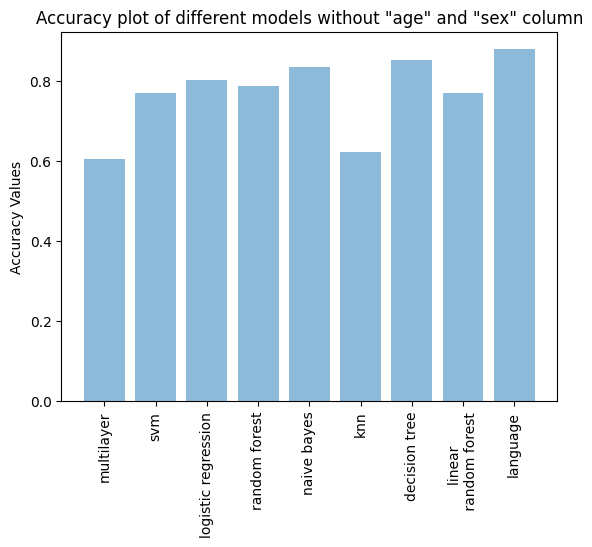

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


y_pos = np.arange(len(list_of_models))

plt.bar(y_pos, accuracy_dict[11], align='center', alpha=0.5)
plt.xticks(y_pos, list_of_models, rotation='vertical')
plt.ylabel('Accuracy Values')
plt.title('Accuracy plot of different models without "age" and "sex" column')

plt.show()

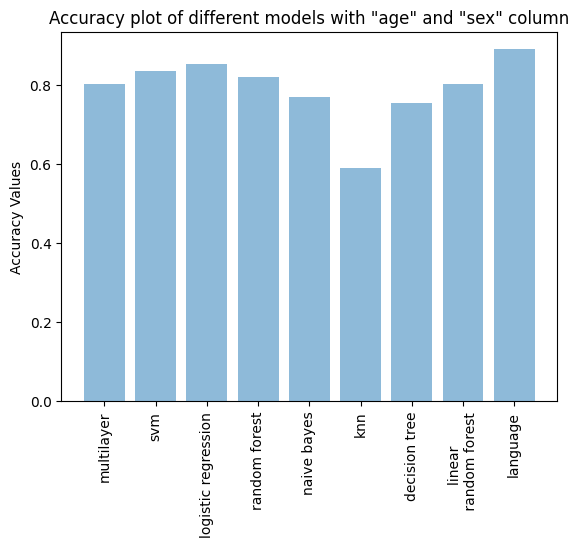

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


y_pos = np.arange(len(list_of_models))

plt.bar(y_pos, accuracy_dict[13], align='center', alpha=0.5)
plt.xticks(y_pos, list_of_models, rotation='vertical')
plt.ylabel('Accuracy Values')
plt.title('Accuracy plot of different models with "age" and "sex" column')

plt.show()

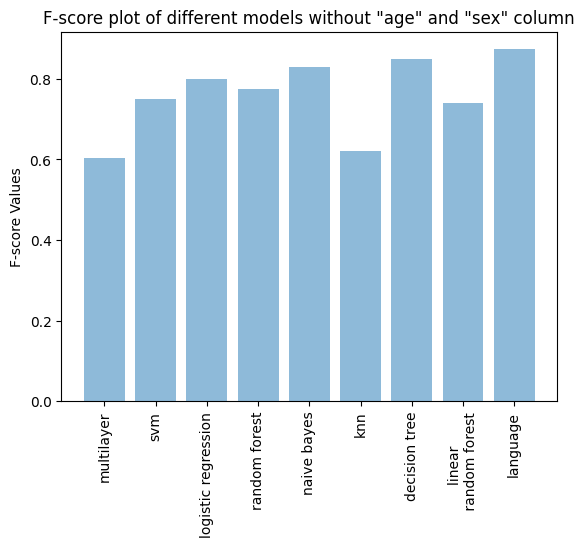

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


y_pos = np.arange(len(list_of_models))

plt.bar(y_pos, fscore_dict[11], align='center', alpha=0.5)
plt.xticks(y_pos, list_of_models, rotation='vertical')
plt.ylabel('F-score Values')
plt.title('F-score plot of different models without "age" and "sex" column')

plt.show()

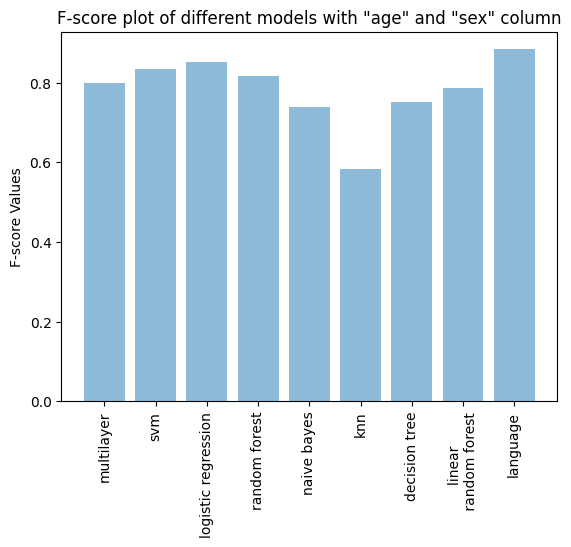

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


y_pos = np.arange(len(list_of_models))

plt.bar(y_pos, fscore_dict[13], align='center', alpha=0.5)
plt.xticks(y_pos, list_of_models, rotation='vertical')
plt.ylabel('F-score Values')
plt.title('F-score plot of different models with "age" and "sex" column')

plt.show()

[0.6038961038961039, 0.7511655011655012, 0.8006535947712419, 0.7750354609929078, 0.8282657657657657, 0.6213225371120108, 0.8498769483182936, 0.7396341463414635, 0.872985661718056]
[0.6065573770491803, 0.7704918032786885, 0.8032786885245902, 0.7868852459016393, 0.8360655737704918, 0.6229508196721312, 0.8524590163934426, 0.7704918032786885, 0.8791208791208791]
